# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [7]:
# Manipulasi data
import pandas as pd
import numpy as np

# Visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing data
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Split data untuk keperluan modeling
from sklearn.model_selection import train_test_split

# Pengaturan tampilan visual
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [8]:
# Memuat dataset
df = pd.read_csv("../employee_data_raw.csv")

# Menampilkan 5 data teratas
df.head()

# Cek bentuk data
print("Jumlah baris dan kolom:", df.shape)

# Cek nama kolom
print("Nama kolom:\n", df.columns.tolist())

# Cek info tipe data
df.info()

# Cek apakah ada data duplikat
print("Jumlah data duplikat:", df.duplicated().sum())

# Cek apakah ada missing value
print("Jumlah missing value per kolom:")
print(df.isnull().sum())



Jumlah baris dan kolom: (1470, 35)
Nama kolom:
 ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   Busin

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

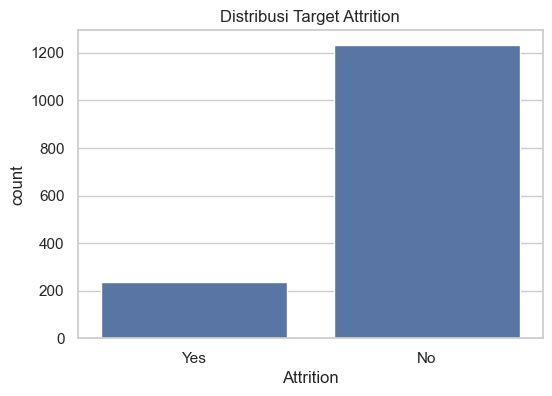

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

Statistik deskriptif fitur numerik:
                           count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSat

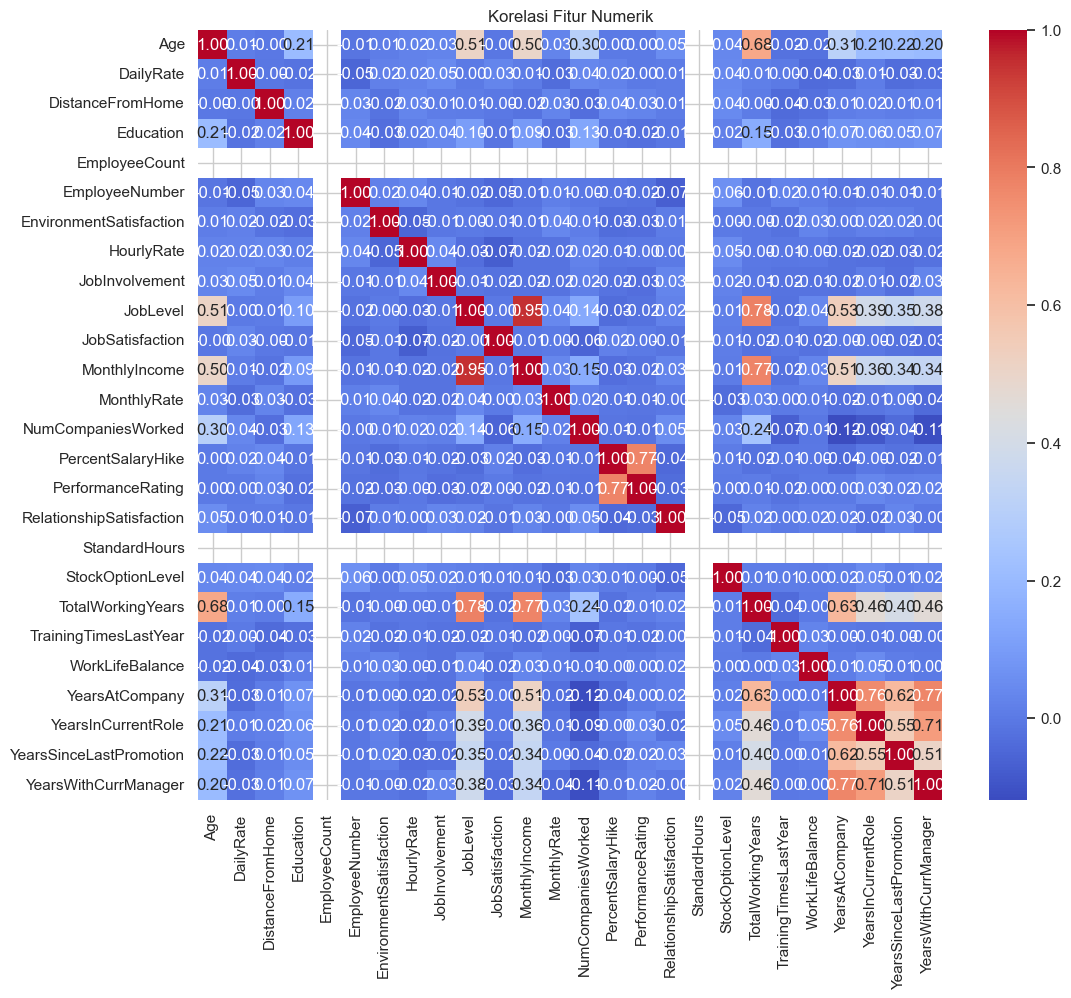

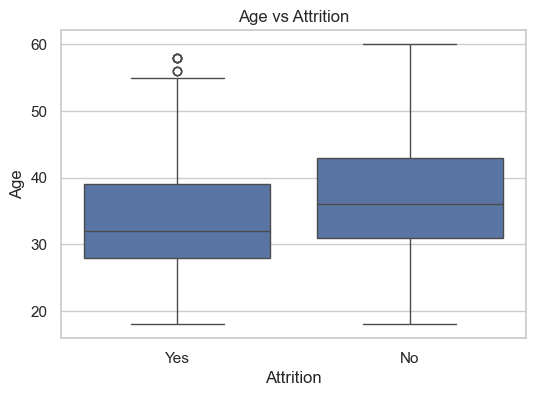

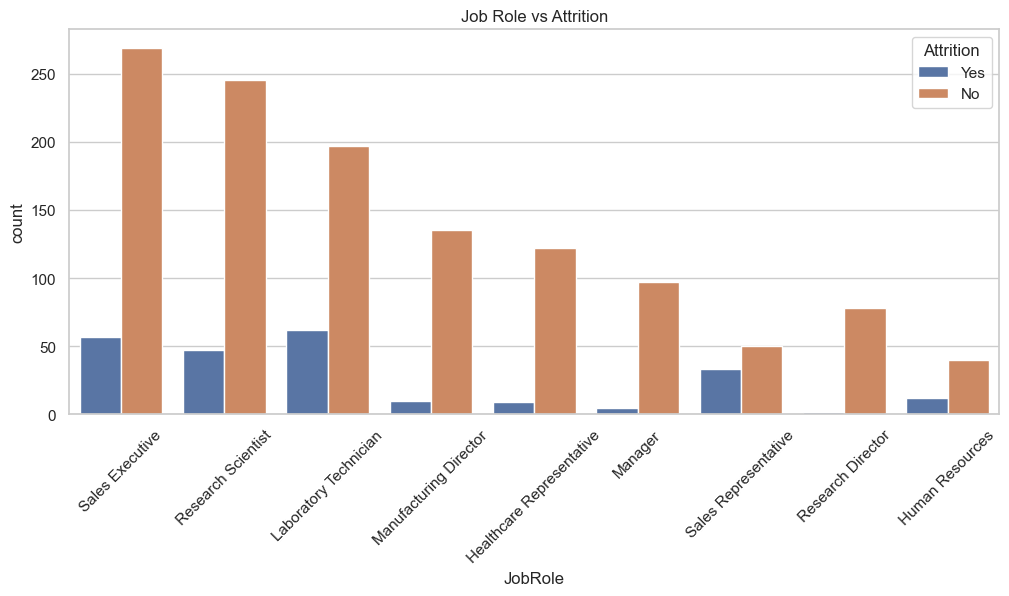

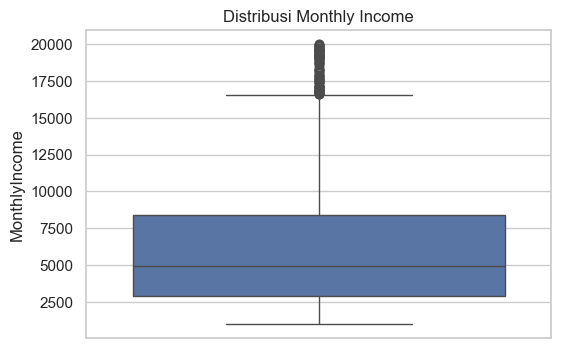

In [9]:
# 1. Distribusi target
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Attrition')
plt.title('Distribusi Target Attrition')
plt.show()
print(df['Attrition'].value_counts(normalize=True) * 100)

# 2. Statistik deskriptif numerik
print("\nStatistik deskriptif fitur numerik:")
print(df.describe().T)

# 3. Statistik fitur kategorikal (contoh)
print("\nDistribusi BusinessTravel:")
print(df['BusinessTravel'].value_counts())

print("\nDistribusi Department:")
print(df['Department'].value_counts())

# 4. Korelasi fitur numerik
plt.figure(figsize=(12,10))
numeric_cols = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Korelasi Fitur Numerik')
plt.show()

# 5. Visualisasi fitur numerik terhadap target
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Age vs Attrition')
plt.show()

# 6. Visualisasi fitur kategorikal terhadap target
plt.figure(figsize=(12,5))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.xticks(rotation=45)
plt.title('Job Role vs Attrition')
plt.show()

# 7. Cek outlier pada MonthlyIncome (opsional)
plt.figure(figsize=(6,4))
sns.boxplot(df['MonthlyIncome'])
plt.title('Distribusi Monthly Income')
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [10]:
# 5. Data Preprocessing

# 1. Cek missing value
print("Missing values per kolom:")
print(df.isnull().sum())

# 2. Cek duplikat
print("Jumlah data duplikat sebelum dihapus:", df.duplicated().sum())
df = df.drop_duplicates()
print("Jumlah data duplikat setelah dihapus:", df.duplicated().sum())

# 3. Hapus kolom yang tidak relevan atau bernilai konstan
cols_to_drop = ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber']
df = df.drop(columns=cols_to_drop)
print(f"Kolom setelah dihapus: {cols_to_drop}")

# 4. Encode target variable Attrition
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# 5. Encoding fitur kategorikal lainnya dengan one-hot encoding
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Fitur kategorikal yang akan di-encode: {cat_cols}")
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# 6. Normalisasi / standarisasi fitur numerik (kecuali target)
from sklearn.preprocessing import StandardScaler

num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('Attrition')  # target tidak di-scale

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Preprocessing selesai. Dataset siap untuk modeling.")
print("Dataset shape setelah preprocessing:", df.shape)
df.head()


Missing values per kolom:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrent

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,1,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,...,False,False,False,False,False,True,False,False,True,True
1,1.322365,0,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,...,False,False,False,False,True,False,False,True,False,False
2,0.008343,1,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,...,True,False,False,False,False,False,False,False,True,True
3,-0.429664,0,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,...,False,False,False,False,True,False,False,True,False,True
4,-1.086676,0,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,...,True,False,False,False,False,False,False,True,False,False
